In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df = pd.read_csv('email_data.csv')
df.head()

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\nth...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\n( see a...",0
2,3624,ham,"Subject: neon retreat\nho ho ho , we ' re arou...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\nthis deal is to ...,0


In [46]:
df.isnull().sum().sum()

0

In [48]:
df.shape

(5171, 4)

In [6]:
df['label'].value_counts()

label
ham     3672
spam    1499
Name: count, dtype: int64

In [8]:
df['label'].value_counts(normalize=True)

label
ham     0.710114
spam    0.289886
Name: proportion, dtype: float64

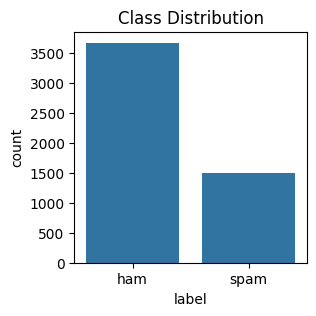

In [10]:
fig, ax = plt.subplots(figsize=(3,3))
ax.set_title("Class Distribution")
sns.countplot(data=df, x='label')
plt.show()

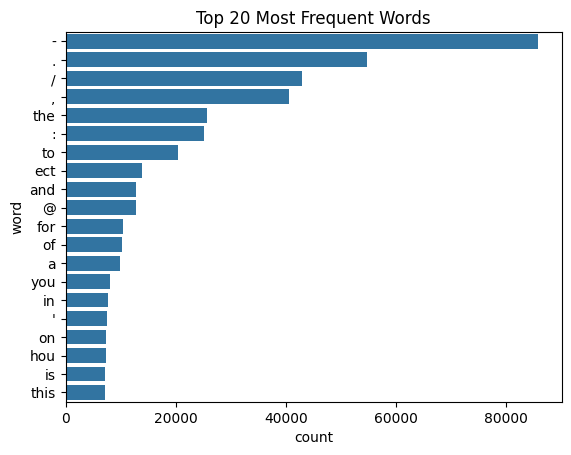

In [12]:
# Visualizing the distribution of most frequent words
from collections import Counter
all_words = " ".join(df['text'].values).split()
word_counts = Counter(all_words)
common_words = word_counts.most_common(20)
common_words_df = pd.DataFrame(common_words, columns=['word', 'count'])
sns.barplot(data=common_words_df, x='count', y='word')
plt.title("Top 20 Most Frequent Words")
plt.show()

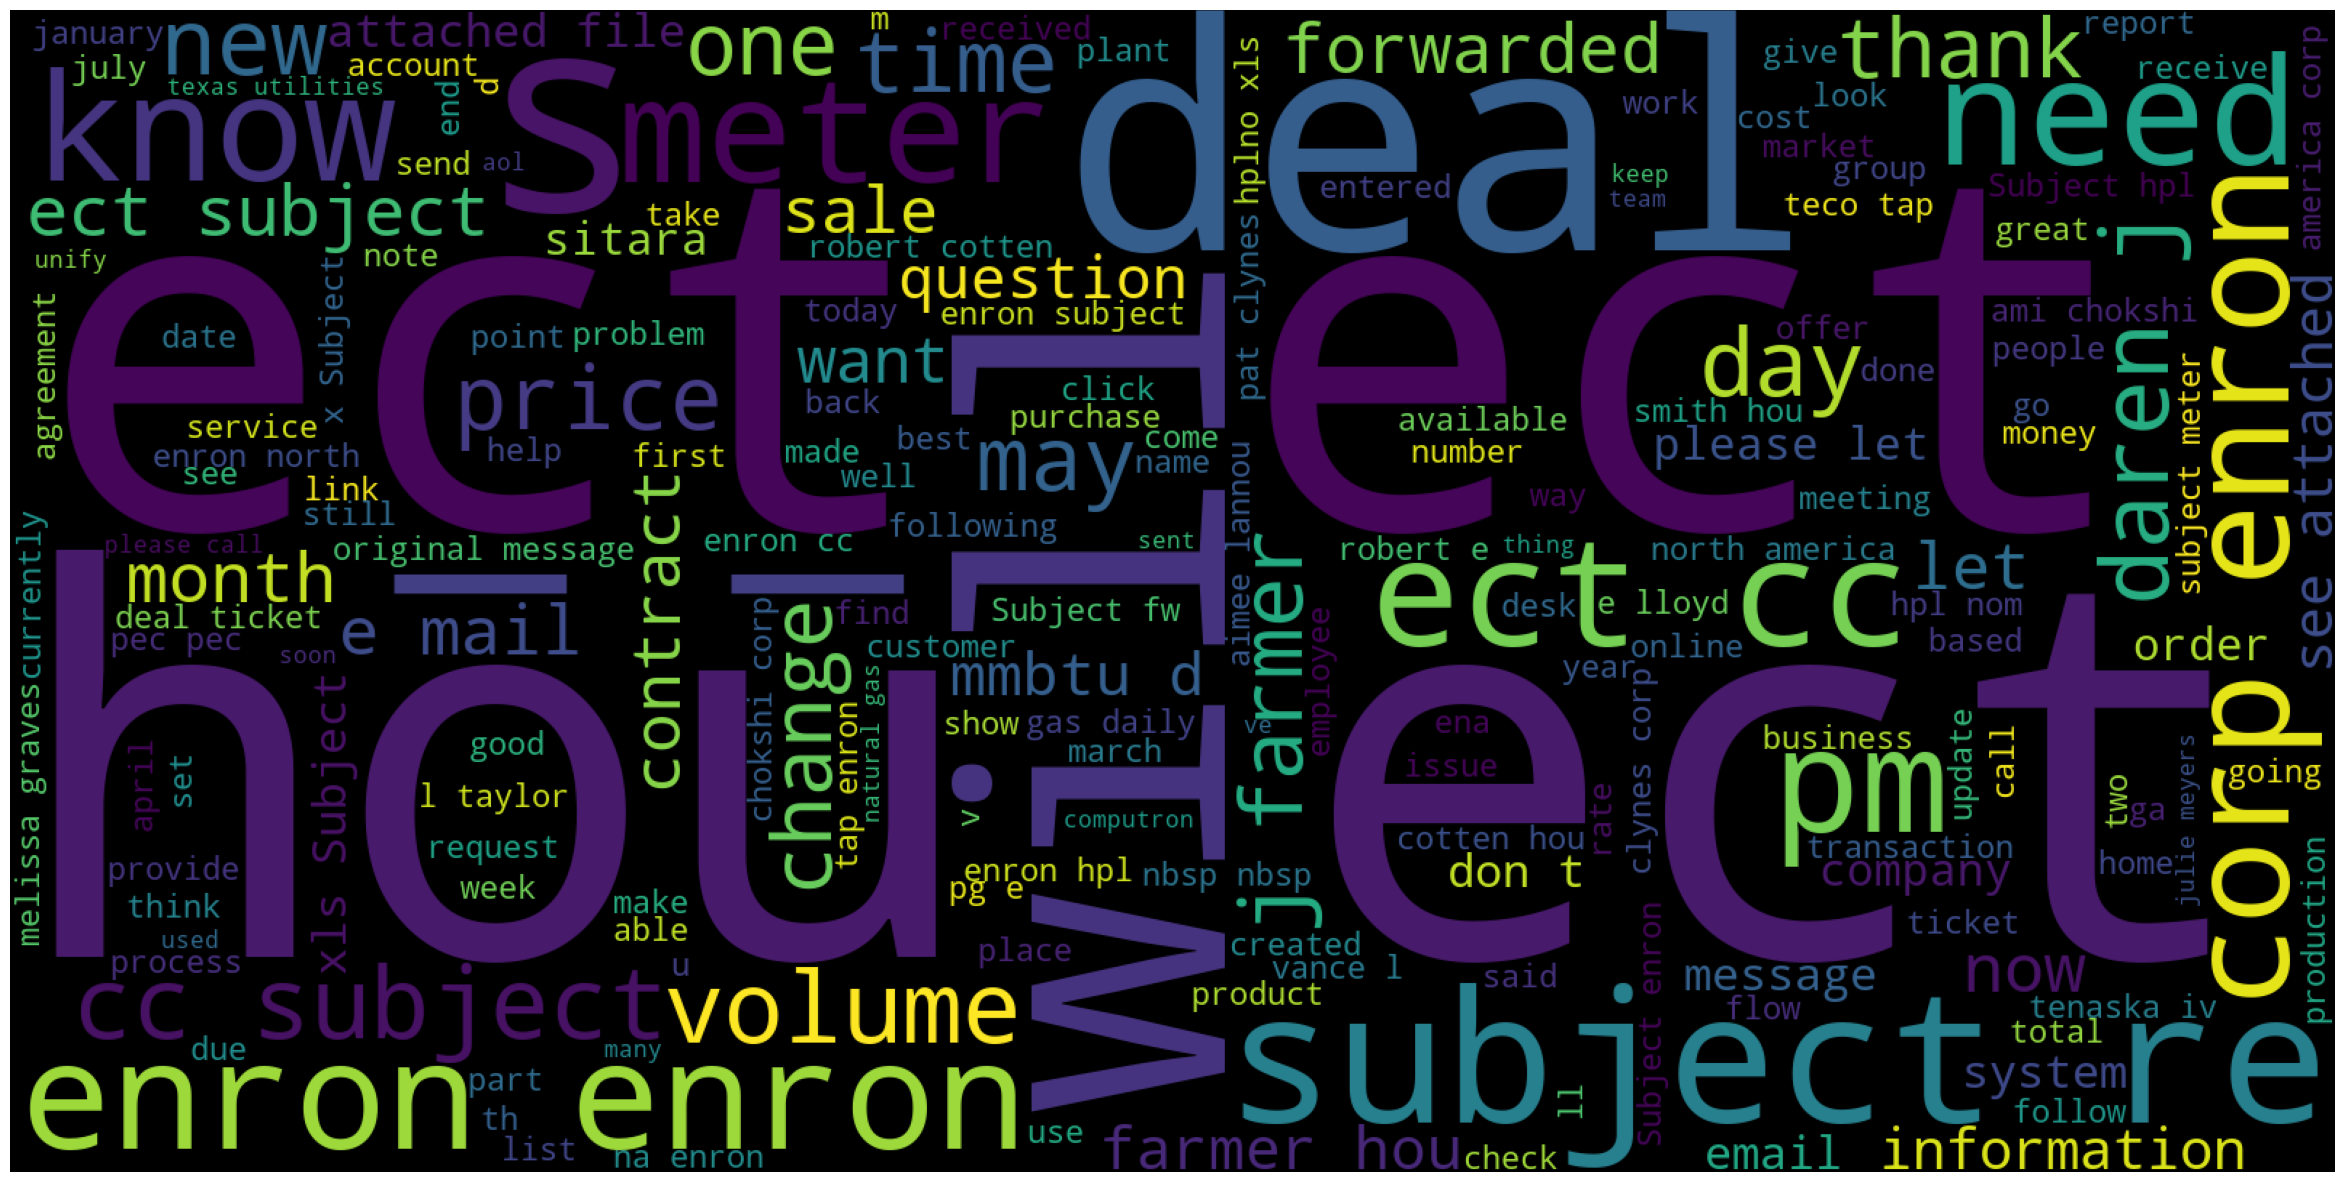

In [14]:
from wordcloud import WordCloud
wc = WordCloud(width=1600,height=800).generate(' '.join(df['text']))
plt.figure(1, figsize=(30,20))
plt.imshow(wc)
plt.axis('off')
plt.show()

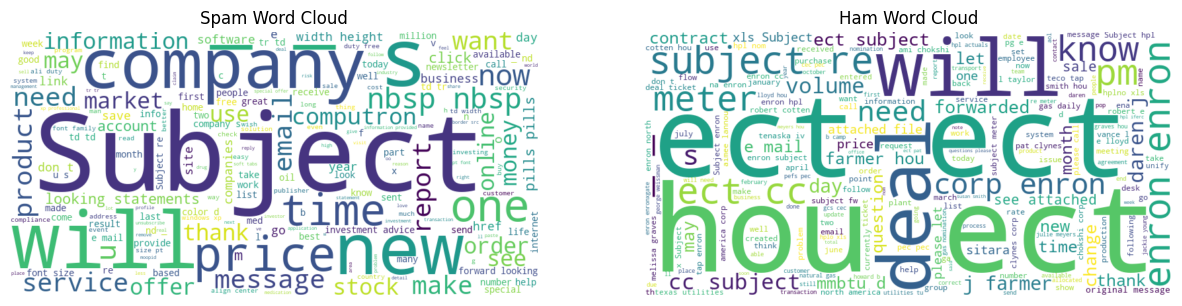

In [16]:
spam_text = " ".join(df[df['label'] =='spam']['text'].values)
spam_wordcloud = WordCloud(width=800,height=400, background_color='white').generate(spam_text)

ham_text = " ".join(df[df['label'] =='ham']['text'].values)
ham_wordcloud = WordCloud(width=800,height=400, background_color='white').generate(ham_text)

# Display the word cloud
fig, ax = plt.subplots(1,2, figsize=(15,7))
ax[0].imshow(spam_wordcloud, interpolation='bilinear')
ax[0].axis('off')
ax[0].set_title('Spam Word Cloud')

ax[1].imshow(ham_wordcloud, interpolation='bilinear')
ax[1].axis('off')
ax[1].set_title('Ham Word Cloud')
plt.show()

In [52]:
# splitting the data into x and y
y = df["label"]
x = df[["text"]]
print(y.head)
print()
print(x.head())

<bound method NDFrame.head of 0        ham
1        ham
2        ham
3       spam
4        ham
        ... 
5166     ham
5167     ham
5168     ham
5169     ham
5170    spam
Name: label, Length: 5171, dtype: object>

                                                text
0  Subject: enron methanol ; meter # : 988291\nth...
1  Subject: hpl nom for january 9 , 2001\n( see a...
2  Subject: neon retreat\nho ho ho , we ' re arou...
3  Subject: photoshop , windows , office . cheap ...
4  Subject: re : indian springs\nthis deal is to ...


In [54]:
x

,text
0,Subject: enron methanol ; meter # : 988291\nth...
1,"Subject: hpl nom for january 9 , 2001\n( see a..."
2,"Subject: neon retreat\nho ho ho , we ' re arou..."
3,"Subject: photoshop , windows , office . cheap ..."
4,Subject: re : indian springs\nthis deal is to ...
...,...
5166,Subject: put the 10 on the ft\nthe transport v...
5167,Subject: 3 / 4 / 2000 and following noms\nhpl ...
5168,Subject: calpine daily gas nomination\n>\n>\nj...
5169,Subject: industrial worksheets for august 2000...


In [56]:
# split the data into training and testing data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42, stratify=y)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(4136, 1) (1035, 1) (4136,) (1035,)


In [40]:
x_train.shape

(4136,)

In [58]:
x_train

,text
656,Subject: re : the hstoett lady sucklng huge cc...
4752,"Subject: lose 19 % , powerful weightloss now a..."
4483,"Subject: 98 - 2601\nhi daren ,\ni ' m attempti..."
1109,Subject: 2 nd rev mar . 2000 josey ranch nom\n...
711,Subject: lose it\nos effetiveeight os aaiabe w...
...,...
2622,Subject: confirming requisitions\nconfirming t...
977,Subject: check the superb specials on top - se...
3111,Subject: union carbide - seadrift hpl meter # ...
4569,Subject: re : personal information needs to be...


In [60]:
import nltk
import re
import string
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

In [62]:
def clean(doc):
    regex = "[^a-zA-Z.]"
    doc = re.sub(regex, " ", doc)
    doc = doc.lower()
    tokens = nltk.word_tokenize(doc)
    stop_words = list(set(stopwords.words('english')))
    custom_stop_words = ['subject', 'ect', 'hou']
    stop_words = stop_words + custom_stop_words
    filtered_tokens = [word for word in tokens if word not in stop_words]
    lemmatized_tokens = [ lemmatizer.lemmatize(token) for token in filtered_tokens]
    return " ".join(lemmatized_tokens)

In [64]:
x_train

,text
656,Subject: re : the hstoett lady sucklng huge cc...
4752,"Subject: lose 19 % , powerful weightloss now a..."
4483,"Subject: 98 - 2601\nhi daren ,\ni ' m attempti..."
1109,Subject: 2 nd rev mar . 2000 josey ranch nom\n...
711,Subject: lose it\nos effetiveeight os aaiabe w...
...,...
2622,Subject: confirming requisitions\nconfirming t...
977,Subject: check the superb specials on top - se...
3111,Subject: union carbide - seadrift hpl meter # ...
4569,Subject: re : personal information needs to be...


In [66]:
# !pip install tqdm
from tqdm import tqdm, tqdm_notebook
#tqdm.pandas()
x_train['clean_text'] = x_train['text'].progress_apply(lambda doc: clean(doc))
x_train.head(10)

100%|█████████████████████████████████████████████████████████████████████████████| 4136/4136 [00:20<00:00, 205.33it/s]


,text,clean_text
656,Subject: re : the hstoett lady sucklng huge cc...,hstoett lady sucklng huge ccok pleasure squire...
4752,"Subject: lose 19 % , powerful weightloss now a...",lose powerful weightloss available . hello spe...
4483,"Subject: 98 - 2601\nhi daren ,\ni ' m attempti...",hi daren attempting clear mentioned meter erro...
1109,Subject: 2 nd rev mar . 2000 josey ranch nom\n...,nd rev mar . josey ranch nom forwarded susan t...
711,Subject: lose it\nos effetiveeight os aaiabe w...,lose o effetiveeight o aaiabe withoutrescripti...
4839,"Subject: reply soon ! ! !\ndear sir ,\ni know ...",reply soon dear sir know email reach surprise ...
1923,"Subject: hpl nom for december 13 , 2000\n( see...",hpl nom december see attached file hplnl . xl ...
2263,"Subject: texas ena off - system rates\nhey , d...",texas ena system rate hey time monday talk ide...
337,"Subject: enron / hpl nom for december 20 , 200...",enron hpl nom december see attached file hplnl...
2809,Subject: yvette ooto\ni will be on vacation mo...,yvette ooto vacation monday april th thru frid...


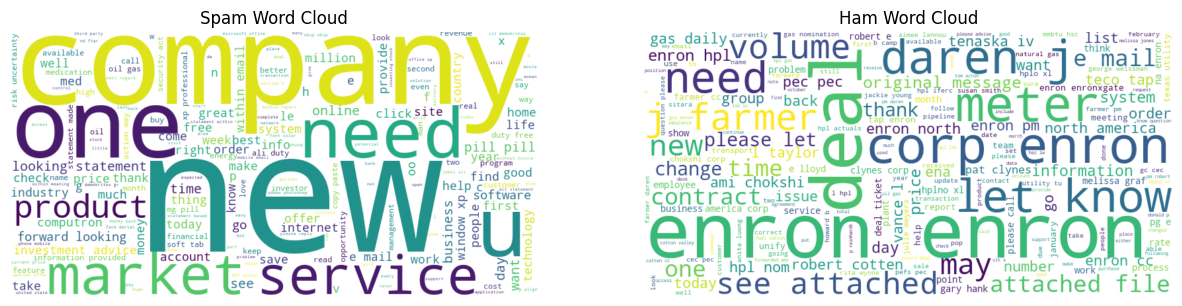

In [72]:
spam_text = " ".join(x_train[y_train =='spam']['clean_text'].values)
spam_wordcloud = WordCloud(width=800,height=400, background_color='white').generate(spam_text)

ham_text = " ".join(x_train[y_train =='ham']['clean_text'].values)
ham_wordcloud = WordCloud(width=800,height=400, background_color='white').generate(ham_text)

# Display the word cloud
fig, ax = plt.subplots(1,2, figsize=(15,7))
ax[0].imshow(spam_wordcloud, interpolation='bilinear')
ax[0].axis('off')
ax[0].set_title('Spam Word Cloud')

ax[1].imshow(ham_wordcloud, interpolation='bilinear')
ax[1].axis('off')
ax[1].set_title('Ham Word Cloud')
plt.show()

In [74]:
x_train

,text,clean_text
656,Subject: re : the hstoett lady sucklng huge cc...,hstoett lady sucklng huge ccok pleasure squire...
4752,"Subject: lose 19 % , powerful weightloss now a...",lose powerful weightloss available . hello spe...
4483,"Subject: 98 - 2601\nhi daren ,\ni ' m attempti...",hi daren attempting clear mentioned meter erro...
1109,Subject: 2 nd rev mar . 2000 josey ranch nom\n...,nd rev mar . josey ranch nom forwarded susan t...
711,Subject: lose it\nos effetiveeight os aaiabe w...,lose o effetiveeight o aaiabe withoutrescripti...
...,...,...
2622,Subject: confirming requisitions\nconfirming t...,confirming requisition confirming open requist...
977,Subject: check the superb specials on top - se...,check superb special top selling r xdrugs . de...
3111,Subject: union carbide - seadrift hpl meter # ...,union carbide seadrift hpl meter union carbide...
4569,Subject: re : personal information needs to be...,personal information need updated fixed sap ab...


In [76]:
x_train['tokenised_sentences'] = x_train['clean_text'].apply(lambda doc:doc.split())
x_train

,text,clean_text,tokenised_sentences
656,Subject: re : the hstoett lady sucklng huge cc...,hstoett lady sucklng huge ccok pleasure squire...,"[hstoett, lady, sucklng, huge, ccok, pleasure,..."
4752,"Subject: lose 19 % , powerful weightloss now a...",lose powerful weightloss available . hello spe...,"[lose, powerful, weightloss, available, ., hel..."
4483,"Subject: 98 - 2601\nhi daren ,\ni ' m attempti...",hi daren attempting clear mentioned meter erro...,"[hi, daren, attempting, clear, mentioned, mete..."
1109,Subject: 2 nd rev mar . 2000 josey ranch nom\n...,nd rev mar . josey ranch nom forwarded susan t...,"[nd, rev, mar, ., josey, ranch, nom, forwarded..."
711,Subject: lose it\nos effetiveeight os aaiabe w...,lose o effetiveeight o aaiabe withoutrescripti...,"[lose, o, effetiveeight, o, aaiabe, withoutres..."
...,...,...,...
2622,Subject: confirming requisitions\nconfirming t...,confirming requisition confirming open requist...,"[confirming, requisition, confirming, open, re..."
977,Subject: check the superb specials on top - se...,check superb special top selling r xdrugs . de...,"[check, superb, special, top, selling, r, xdru..."
3111,Subject: union carbide - seadrift hpl meter # ...,union carbide seadrift hpl meter union carbide...,"[union, carbide, seadrift, hpl, meter, union, ..."
4569,Subject: re : personal information needs to be...,personal information need updated fixed sap ab...,"[personal, information, need, updated, fixed, ..."


# Word2Vec - Feature Transformation

In [80]:
from gensim.models import Word2Vec

In [84]:
# word2vec is dense vector where dim would be 50 to 300
%time word2vec_vect = Word2Vec(x_train['tokenised_sentences'], vector_size=300, min_count=1)
print(word2vec_vect)

CPU times: total: 5.25 s
Wall time: 5.54 s
Word2Vec<vocab=37315, vector_size=300, alpha=0.025>


In [86]:
print(f"Number of documents used for Training: {word2vec_vect.corpus_count}")
print()
print(f"Vocabulary Size: {len(word2vec_vect.wv.index_to_key)}")
print()
print(f"Vector size: {word2vec_vect.vector_size}")

Number of documents used for Training: 4136

Vocabulary Size: 37315

Vector size: 300


In [88]:
37315 * 300

11194500

In [94]:
def get_document_vector(doc, model):
    # create document vectors by averaging word 300 dim (word vector)
    tokens = [word for word in doc if word in model]
    if tokens:
        doc_embedding = np.mean(model[tokens], axis=0)
    else:
        doc_embedding = np.zeros(model.vector_size)
    return doc_embedding    

In [98]:
x_train['w2v_doc_embedding'] = x_train['tokenised_sentences'].apply(lambda doc:get_document_vector(doc, word2vec_vect.wv))

In [100]:
x_train

,text,clean_text,tokenised_sentences,w2v_doc_embedding
656,Subject: re : the hstoett lady sucklng huge cc...,hstoett lady sucklng huge ccok pleasure squire...,"[hstoett, lady, sucklng, huge, ccok, pleasure,...","[-0.040709924, 0.07921241, 0.014791803, 0.0409..."
4752,"Subject: lose 19 % , powerful weightloss now a...",lose powerful weightloss available . hello spe...,"[lose, powerful, weightloss, available, ., hel...","[-0.23192407, 0.27547348, 0.1177937, 0.2216817..."
4483,"Subject: 98 - 2601\nhi daren ,\ni ' m attempti...",hi daren attempting clear mentioned meter erro...,"[hi, daren, attempting, clear, mentioned, mete...","[-0.16670366, 0.6564821, 0.00032238715, 0.1026..."
1109,Subject: 2 nd rev mar . 2000 josey ranch nom\n...,nd rev mar . josey ranch nom forwarded susan t...,"[nd, rev, mar, ., josey, ranch, nom, forwarded...","[-0.32125333, 0.623984, 0.07109502, 0.21362664..."
711,Subject: lose it\nos effetiveeight os aaiabe w...,lose o effetiveeight o aaiabe withoutrescripti...,"[lose, o, effetiveeight, o, aaiabe, withoutres...","[-0.049517717, 0.09135867, 0.027370123, 0.0638..."
...,...,...,...,...
2622,Subject: confirming requisitions\nconfirming t...,confirming requisition confirming open requist...,"[confirming, requisition, confirming, open, re...","[-0.16481453, 0.6750495, 0.020658419, 0.145284..."
977,Subject: check the superb specials on top - se...,check superb special top selling r xdrugs . de...,"[check, superb, special, top, selling, r, xdru...","[-0.19523698, 0.2660031, 0.11675664, 0.1976368..."
3111,Subject: union carbide - seadrift hpl meter # ...,union carbide seadrift hpl meter union carbide...,"[union, carbide, seadrift, hpl, meter, union, ...","[-0.2709009, 0.71422195, 0.023437588, 0.059681..."
4569,Subject: re : personal information needs to be...,personal information need updated fixed sap ab...,"[personal, information, need, updated, fixed, ...","[-0.23722501, 0.7954044, 0.042108927, 0.198602..."


In [102]:
x_test['clean_text'] = x_test['text'].progress_apply(lambda doc: clean(doc))
x_test.head(10)

100%|█████████████████████████████████████████████████████████████████████████████| 1035/1035 [00:06<00:00, 167.46it/s]


,text,clean_text
774,Subject: final cp name change and merger repor...,final cp name change merger report clarify feb...
2630,Subject: calpine daily gas nomination\n- hidal...,calpine daily gas nomination hidalgo daily gas...
2543,Subject: calpine daily gas nomination\n>\naime...,calpine daily gas nomination aimee office frid...
3291,"Subject: wells\ndaren , i think i may have los...",well daren think may lost mind comment vance t...
5024,Subject: first deliveries - comstock oil & gas...,first delivery comstock oil gas hesco gatherin...
1623,Subject: 3 . 25 rate confirmation # 367886924 ...,. rate confirmation jb wed jun hello sent emai...
4935,Subject: first delivery - rodessa operating co...,first delivery rodessa operating co . see atta...
3241,Subject: new pan energy exchange deal meeting\...,new pan energy exchange deal meeting daren ple...
1504,Subject: announcement for february 7\nplease t...,announcement february please talk senior high ...
5015,Subject: highest gains without guesswork\nwysa...,highest gain without guesswork wysak petroleum...


In [104]:
x_test['tokenised_sentences'] = x_test['clean_text'].apply(lambda doc:doc.split())
x_test

,text,clean_text,tokenised_sentences
774,Subject: final cp name change and merger repor...,final cp name change merger report clarify feb...,"[final, cp, name, change, merger, report, clar..."
2630,Subject: calpine daily gas nomination\n- hidal...,calpine daily gas nomination hidalgo daily gas...,"[calpine, daily, gas, nomination, hidalgo, dai..."
2543,Subject: calpine daily gas nomination\n>\naime...,calpine daily gas nomination aimee office frid...,"[calpine, daily, gas, nomination, aimee, offic..."
3291,"Subject: wells\ndaren , i think i may have los...",well daren think may lost mind comment vance t...,"[well, daren, think, may, lost, mind, comment,..."
5024,Subject: first deliveries - comstock oil & gas...,first delivery comstock oil gas hesco gatherin...,"[first, delivery, comstock, oil, gas, hesco, g..."
...,...,...,...
1903,Subject: hpl fuel gas buy - back for december ...,hpl fuel gas buy back december fyi forwarded g...,"[hpl, fuel, gas, buy, back, december, fyi, for..."
1376,"Subject: re : exxon company , usa global # 960...",exxon company usa global sitara checked sitara...,"[exxon, company, usa, global, sitara, checked,..."
1905,Subject: i ' m glad we met\ntotally awesome\nc...,glad met totally awesome city city guide chic ...,"[glad, met, totally, awesome, city, city, guid..."
1846,"Subject: hpl nom for july 14 , 2000\n( see att...",hpl nom july see attached file hplo . xl hplo ...,"[hpl, nom, july, see, attached, file, hplo, .,..."


In [106]:
x_test['w2v_doc_embedding'] = x_test['tokenised_sentences'].apply(lambda doc:get_document_vector(doc, word2vec_vect.wv))

In [108]:
x_test

,text,clean_text,tokenised_sentences,w2v_doc_embedding
774,Subject: final cp name change and merger repor...,final cp name change merger report clarify feb...,"[final, cp, name, change, merger, report, clar...","[-0.1655397, 0.45228896, 0.09848558, 0.2129230..."
2630,Subject: calpine daily gas nomination\n- hidal...,calpine daily gas nomination hidalgo daily gas...,"[calpine, daily, gas, nomination, hidalgo, dai...","[-0.3055293, 0.62200904, 0.29280707, 0.1243123..."
2543,Subject: calpine daily gas nomination\n>\naime...,calpine daily gas nomination aimee office frid...,"[calpine, daily, gas, nomination, aimee, offic...","[-0.27999508, 0.5089657, 0.21110034, 0.1643275..."
3291,"Subject: wells\ndaren , i think i may have los...",well daren think may lost mind comment vance t...,"[well, daren, think, may, lost, mind, comment,...","[-0.24026339, 0.67191, 0.053912837, 0.14089753..."
5024,Subject: first deliveries - comstock oil & gas...,first delivery comstock oil gas hesco gatherin...,"[first, delivery, comstock, oil, gas, hesco, g...","[-0.17852563, 0.52598405, 0.14843446, 0.128154..."
...,...,...,...,...
1903,Subject: hpl fuel gas buy - back for december ...,hpl fuel gas buy back december fyi forwarded g...,"[hpl, fuel, gas, buy, back, december, fyi, for...","[-0.2822499, 0.9108924, -0.03428825, 0.1650786..."
1376,"Subject: re : exxon company , usa global # 960...",exxon company usa global sitara checked sitara...,"[exxon, company, usa, global, sitara, checked,...","[-0.2327071, 0.56788284, 0.05846642, 0.1272582..."
1905,Subject: i ' m glad we met\ntotally awesome\nc...,glad met totally awesome city city guide chic ...,"[glad, met, totally, awesome, city, city, guid...","[-0.17128982, 0.27314323, 0.103778474, 0.19318..."
1846,"Subject: hpl nom for july 14 , 2000\n( see att...",hpl nom july see attached file hplo . xl hplo ...,"[hpl, nom, july, see, attached, file, hplo, .,...","[-0.017466143, 0.7446738, 0.39107248, 0.373467..."


In [112]:
# RandomForest
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

classifier = RandomForestClassifier()
%time classifier.fit(list(x_train['w2v_doc_embedding']), y_train)
y_pred = classifier.predict(list(x_test['w2v_doc_embedding']))
print(y_pred)
print()
print(f"Model's Accuracy : {metrics.accuracy_score(y_test, y_pred)}")
print()
print(f"Model's Classification Performanace : {metrics.classification_report(y_test, y_pred)}")

CPU times: total: 3.39 s
Wall time: 10.3 s
['ham' 'ham' 'ham' ... 'spam' 'ham' 'spam']

Model's Accuracy : 0.957487922705314

Model's Classification Performanace :               precision    recall  f1-score   support

         ham       0.97      0.97      0.97       735
        spam       0.93      0.92      0.93       300

    accuracy                           0.96      1035
   macro avg       0.95      0.95      0.95      1035
weighted avg       0.96      0.96      0.96      1035

